<a href="https://colab.research.google.com/github/Jaswanth-03/ML-intermediate/blob/main/whole_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA and Data preprocessing

# handling missing data

In [ ]:
import pandas as pd

data = pd.DataFrame({'A': [1, 2, None, 4, 5],
                     'B': [None, 2, 3, 4, 5]})
print(data)

# Remove rows with any missing values
data_cleaned = data.dropna()
print("Data after removing rows with missing values:")
print(data_cleaned)

# Remove columns with any missing values
data_cleaned = data.dropna(axis=1)
print("\nData after removing columns with missing values:")
print(data_cleaned)


     A    B
0  1.0  NaN
1  2.0  2.0
2  NaN  3.0
3  4.0  4.0
4  5.0  5.0
Data after removing rows with missing values:
     A    B
1  2.0  2.0
3  4.0  4.0
4  5.0  5.0

Data after removing columns with missing values:
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]


# Fill missing values with the mean


In [ ]:
import pandas as pd

data = pd.Series([1, 2, None, 4, 5])

# Fill missing values with the mean
data_imputed = data.fillna(data.mean())
print("Data after imputation with the mean:")
print(data_imputed)


Data after imputation with the mean:
0    1.0
1    2.0
2    3.0
3    4.0
4    5.0
dtype: float64


# Forward fill missing values
# Backward fill missing values


In [ ]:
import pandas as pd

data = pd.Series([1, None, 3, None, 5])

# Forward fill missing values
data_filled = data.ffill()
print("Data after forward fill:")
print(data_filled)

# Backward fill missing values
data_filled = data.bfill()
print("\nData after backward fill:")
print(data_filled)


Data after forward fill:
0    1.0
1    1.0
2    3.0
3    3.0
4    5.0
dtype: float64

Data after backward fill:
0    1.0
1    3.0
2    3.0
3    5.0
4    5.0
dtype: float64


# Linear interpolation


In [ ]:
import pandas as pd

data = pd.Series([1, None, 3, None, 5])

# Linear interpolation
data_interpolated = data.interpolate()
print("Data after linear interpolation:")
print(data_interpolated)


Data after linear interpolation:
0    1.0
1    2.0
2    3.0
3    4.0
4    5.0
dtype: float64


# Custom function to replace missing values


In [ ]:
import pandas as pd

data = pd.Series([1, None, 3, None, 5])

# Custom function to replace missing values
def custom_impute(val):
    if pd.isnull(val):
        return 0
    else:
        return val

data_custom_imputed = data.apply(custom_impute)
print("Data after custom imputation:")
print(data_custom_imputed)


Data after custom imputation:
0    1.0
1    0.0
2    3.0
3    0.0
4    5.0
dtype: float64


# Remove duplicate rows


In [ ]:
import pandas as pd

data = pd.DataFrame({'A': [1, 2, 2, 3, 4],
                     'B': ['foo', 'bar', 'bar', 'baz', 'qux']})

# Remove duplicate rows
data_cleaned = data.drop_duplicates()
print("Data after removing duplicates:")
print(data_cleaned)


Data after removing duplicates:
   A    B
0  1  foo
1  2  bar
3  3  baz
4  4  qux


# Impute missing categorical values with the most frequent category
# Alternatively, create a new category for missing values


In [ ]:
import pandas as pd

data = pd.DataFrame({'A': ['apple', 'banana', None, 'orange', 'banana']})

# Impute missing categorical values with the most frequent category
print("Data after imputing missing categorical values:")
print(data['A'].fillna(data['A'].mode()[0]))

# Alternatively, create a new category for missing values
data['A'].fillna('missing', inplace=True)
print("\nData after creating a new category for missing values:")
print(data)


Data after imputing missing categorical values:
0     apple
1    banana
2    banana
3    orange
4    banana
Name: A, dtype: object

Data after creating a new category for missing values:
         A
0    apple
1   banana
2  missing
3   orange
4   banana


# Fill missing dates with a date range
# Fill missing values with interpolation or other methods


In [ ]:
import pandas as pd

data = pd.DataFrame({'Date': ['2023-01-01', '2023-01-02', None, '2023-01-04'],
                     'Value': [10, 20, 15, 30]})

print(data.info())

# Convert the 'Date' column to a datetime type
data['Date'] = pd.to_datetime(data['Date'])
print("Data after converting 'Date' to datetime:")
print(data)

# Fill missing dates with a date range
data = data.set_index('Date').asfreq('D')
print("\nData after filling missing dates with a date range:")
print(data)

# Fill missing values with interpolation or other methods
data['Value'] = data['Value'].interpolate()
print("\nData after interpolating missing values:")
print(data)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    3 non-null      object
 1   Value   4 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 192.0+ bytes
None
Data after converting 'Date' to datetime:
        Date  Value
0 2023-01-01     10
1 2023-01-02     20
2        NaT     15
3 2023-01-04     30

Data after filling missing dates with a date range:
            Value
Date             
2023-01-01   10.0
2023-01-02   20.0
2023-01-03    NaN
2023-01-04   30.0

Data after interpolating missing values:
            Value
Date             
2023-01-01   10.0
2023-01-02   20.0
2023-01-03   25.0
2023-01-04   30.0


In [ ]:
import pandas as pd

# Create a DataFrame with a DateTimeIndex
date_rng = pd.date_range(start='2023-01-01', end='2023-05-10', freq='D')
data = pd.DataFrame({'values': range(len(date_rng))}, index=date_rng)

# Resample the data to a different frequency (e.g., monthly)
resampled_data = data.asfreq('M')
print("Original Data:")
print(data)
print("\nResampled Data to Monthly Frequency:")
print(resampled_data)


Original Data:
            values
2023-01-01       0
2023-01-02       1
2023-01-03       2
2023-01-04       3
2023-01-05       4
...            ...
2023-05-06     125
2023-05-07     126
2023-05-08     127
2023-05-09     128
2023-05-10     129

[130 rows x 1 columns]

Resampled Data to Monthly Frequency:
            values
2023-01-31      30
2023-02-28      58
2023-03-31      89
2023-04-30     119


In [ ]:
# Forward-fill missing data
resampled_data_ffill = data.asfreq('M', method='ffill')
print("\nResampled Data with Forward-Fill:")
print(resampled_data_ffill)

# Backward-fill missing data
resampled_data_bfill = data.asfreq('M', method='bfill')
print("\nResampled Data with Backward-Fill:")
print(resampled_data_bfill)



Resampled Data with Forward-Fill:
            values
2023-01-31      30
2023-02-28      58
2023-03-31      89
2023-04-30     119

Resampled Data with Backward-Fill:
            values
2023-01-31      30
2023-02-28      58
2023-03-31      89
2023-04-30     119


# asfreq function

# Resample the data to a monthly frequency


In [ ]:
import pandas as pd

# Create a DataFrame with daily data
date_rng = pd.date_range(start='2023-01-01', end='2023-06-10', freq='D')
data = pd.DataFrame({'values': range(len(date_rng))}, index=date_rng)

# Resample the data to a monthly frequency
resampled_data = data.asfreq('M')
print("Data resampled to monthly frequency:")
print(resampled_data)


Data resampled to monthly frequency:
            values
2023-01-31      30
2023-02-28      58
2023-03-31      89
2023-04-30     119
2023-05-31     150


# Resample the data to a monthly frequency with forward-fill for missing values


In [ ]:
# Resample the data to a monthly frequency with forward-fill for missing values
resampled_data = data.asfreq('M', method='ffill')
print("Data resampled to monthly frequency with forward-fill:")
print(resampled_data)


Data resampled to monthly frequency with forward-fill:
            values
2023-01-31      30
2023-02-28      58
2023-03-31      89
2023-04-30     119
2023-05-31     150


# Resample the data to a daily frequency and normalize the DateTimeIndex


In [ ]:
# Resample the data to a daily frequency and normalize the DateTimeIndex
resampled_data = data.asfreq('D', normalize=True)
print("Data resampled to daily frequency with a normalized DateTimeIndex:")
print(resampled_data)


Data resampled to daily frequency with a normalized DateTimeIndex:
            values
2023-01-01       0
2023-01-02       1
2023-01-03       2
2023-01-04       3
2023-01-05       4
...            ...
2023-06-06     156
2023-06-07     157
2023-06-08     158
2023-06-09     159
2023-06-10     160

[161 rows x 1 columns]


# Upsample the series into 30-second bins


In [ ]:
import pandas as pd

# Create a DataFrame with a time series
date_rng = pd.date_range('1/1/2000', periods=4, freq='T')
series = pd.Series([0.0, None, 2.0, 3.0], index=date_rng)
df = pd.DataFrame({'s': series})

# Upsample the series into 30-second bins
df_asfreq = df.asfreq(freq='30S')
print("Data upsampled to 30-second bins:")
print(df_asfreq)


Data upsampled to 30-second bins:
                       s
2000-01-01 00:00:00  0.0
2000-01-01 00:00:30  NaN
2000-01-01 00:01:00  NaN
2000-01-01 00:01:30  NaN
2000-01-01 00:02:00  2.0
2000-01-01 00:02:30  NaN
2000-01-01 00:03:00  3.0


# Replace missing text with a placeholder


In [ ]:
import pandas as pd

data = pd.Series(['text 1', None, 'text 3', 'text 4', None])

# Replace missing text with a placeholder
data.fillna('No Text', inplace=True)
print("Data after replacing missing text values:")
print(data)


Data after replacing missing text values:
0     text 1
1    No Text
2     text 3
3     text 4
4    No Text
dtype: object


# Replace missing temperature values based on weather conditions


In [ ]:
import pandas as pd

data = pd.DataFrame({'Temperature': [25, None, 30, None, 20],
                     'Weather': ['sunny', 'cloudy', 'rainy', 'sunny', 'rainy']})

# Replace missing temperature values based on weather conditions
data.loc[(data['Temperature'].isna()) & (data['Weather'] == 'sunny'), 'Temperature'] = 28
data.loc[(data['Temperature'].isna()) & (data['Weather'] == 'cloudy'), 'Temperature'] = 22
data.loc[(data['Temperature'].isna()) & (data['Weather'] == 'rainy'), 'Temperature'] = 18
print("Data after replacing missing temperature values based on weather conditions:")
print(data)


Data after replacing missing temperature values based on weather conditions:
   Temperature Weather
0         25.0   sunny
1         22.0  cloudy
2         30.0   rainy
3         28.0   sunny
4         20.0   rainy


# Feature scaling and normalization

# Min-Max Scaling:


In [ ]:
# Min-Max Scaling:
# Min-Max scaling, also known as normalization, scales your data to a fixed range, typically [0, 1].

# python
# Copy code
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Sample data
data = np.array([[1.0, 2.0, 3.0],
                 [4.0, 5.0, 6.0],
                 [7.0, 8.0, 9.0]])

# Create a Min-Max scaler
scaler = MinMaxScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(data)

print("Original Data:")
print(data)
print("\nScaled Data (Min-Max Scaling):")
print(scaled_data)

Original Data:
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]

Scaled Data (Min-Max Scaling):
[[0.  0.  0. ]
 [0.5 0.5 0.5]
 [1.  1.  1. ]]


# Z-Score (Standardization):


In [ ]:
# Z-Score (Standardization):
# Standardization scales your data to have a mean of 0 and a standard deviation of 1.

# python
# Copy code
from sklearn.preprocessing import StandardScaler

# Sample data
data = np.array([[1.0, 2.0, 3.0],
                 [4.0, 5.0, 6.0],
                 [7.0, 8.0, 9.0]])

# Create a StandardScaler
scaler = StandardScaler()

# Fit and transform the data
standardized_data = scaler.fit_transform(data)

print("Original Data:")
print(data)
print("\nStandardized Data (Z-Score):")
print(standardized_data)

Original Data:
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]

Standardized Data (Z-Score):
[[-1.22474487 -1.22474487 -1.22474487]
 [ 0.          0.          0.        ]
 [ 1.22474487  1.22474487  1.22474487]]


# Robust Scaling:


In [ ]:
# Robust Scaling:
# Robust scaling is a technique that scales your data based on percentiles and is more robust to outliers.

# python
# Copy code
from sklearn.preprocessing import RobustScaler

# Sample data with outliers
data = np.array([[1.0, 2.0, 3.0],
                 [4.0, 5.0, 6.0],
                 [100.0, 200.0, 300.0]])

# Create a RobustScaler
scaler = RobustScaler()

# Fit and transform the data
robust_scaled_data = scaler.fit_transform(data)

print("Original Data (with outliers):")
print(data)
print("\nRobust Scaled Data:")
print(robust_scaled_data)

Original Data (with outliers):
[[  1.   2.   3.]
 [  4.   5.   6.]
 [100. 200. 300.]]

Robust Scaled Data:
[[-0.06060606 -0.03030303 -0.02020202]
 [ 0.          0.          0.        ]
 [ 1.93939394  1.96969697  1.97979798]]


# Power Transformer:


In [ ]:
# Power Transformer:
# Power Transformer applies power and logarithmic transformations to make the data more Gaussian-like.

# python
# Copy code
from sklearn.preprocessing import PowerTransformer

# Sample data
data = np.array([[1.0, 2.0, 3.0],
                 [4.0, 5.0, 6.0],
                 [7.0, 8.0, 9.0]])

# Create a PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

# Fit and transform the data
transformed_data = scaler.fit_transform(data)

print("Original Data:")
print(data)
print("\nTransformed Data (Power Transformer):")
print(transformed_data)

Original Data:
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]

Transformed Data (Power Transformer):
[[-1.27811626 -1.26755013 -1.26070573]
 [ 0.11483097  0.09064754  0.07540621]
 [ 1.16328529  1.17690258  1.18529952]]


# Quantile Transformer:


In [ ]:
# Quantile Transformer:
# Quantile Transformer maps data to a uniform or Gaussian distribution.

# python
# Copy code
from sklearn.preprocessing import QuantileTransformer

# Sample data
data = np.array([[1.0, 2.0, 3.0],
                 [4.0, 5.0, 6.0],
                 [7.0, 8.0, 9.0]])

# Create a QuantileTransformer
scaler = QuantileTransformer(output_distribution='uniform')

# Fit and transform the data
quantile_transformed_data = scaler.fit_transform(data)

print("Original Data:")
print(data)
print("\nQuantile Transformed Data:")
print(quantile_transformed_data)

Original Data:
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]

Quantile Transformed Data:
[[0.  0.  0. ]
 [0.5 0.5 0.5]
 [1.  1.  1. ]]


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (3). n_quantiles is set to n_samples.
  warnings.warn(


# 5. Log Transformation:


In [ ]:
# 5. Log Transformation:

# A log transformation is often used when dealing with data that has a skewed distribution, helping to make it more normally distributed.

# In a log transformation:

# scss
# Copy code
# X_scaled = log(X)
# Python code example:

# python
# Copy code
import numpy as np

# Sample data (positive values)
data = np.array([[1.0, 2.0],
                 [4.0, 5.0],
                 [7.0, 8.0]])

log_transformed_data = np.log(data)

print("Original Data:")
print(data)
print("\nLog-Transformed Data:")
print(log_transformed_data)

Original Data:
[[1. 2.]
 [4. 5.]
 [7. 8.]]

Log-Transformed Data:
[[0.         0.69314718]
 [1.38629436 1.60943791]
 [1.94591015 2.07944154]]


Original Data:
[4.28423784e+00 5.48323712e-01 1.07452928e+00 8.96058701e-01
 1.04382752e+00 3.21451994e+00 1.00299691e+00 1.44428204e+00
 1.70656413e-01 8.37111316e-02 8.13655141e+00 2.77378403e+00
 2.53957571e+00 2.39443861e+00 2.00117096e+00 3.75262128e-01
 9.98056664e+00 5.10896329e-01 1.92420210e+00 2.97320329e+00
 7.20466979e-01 1.17033602e+00 1.49034938e+00 4.67293009e-01
 2.50092621e+00 3.12502797e+00 9.28548538e-01 9.07055473e-01
 1.75291773e+00 6.10007106e-01 2.89923226e+00 4.05280286e+00
 2.55351618e+00 2.14363512e-01 2.23617218e-01 6.37293902e-01
 7.45684367e-02 5.07976690e-01 6.68766913e-01 1.25501409e-02
 2.08852110e+00 1.96399571e+00 4.86088105e+00 4.42994425e+00
 1.80921356e+00 5.63381449e-01 3.75683144e+00 4.58550408e-01
 3.11697044e+00 2.21345564e-01 1.59360700e+00 3.60402774e+00
 1.47029453e-02 3.14730609e+00 1.16423475e+00 2.56964227e+00
 3.20040333e-01 2.72669534e+00 2.69298957e+00 3.11590924e+00
 1.22235886e+00 9.72813291e+00 3.43823473e+00 6.13926184e+00
 2.677150

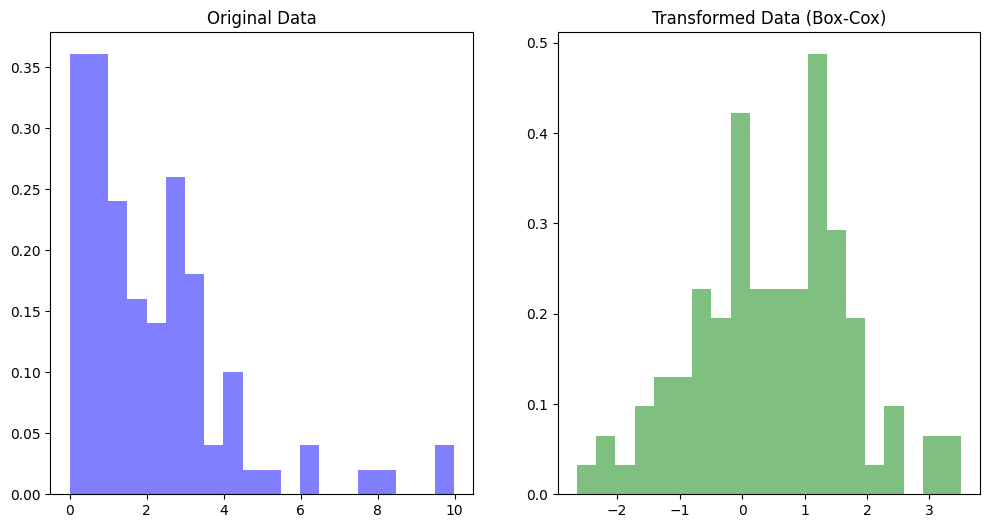

In [ ]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Generate some example data
data = np.random.exponential(scale=2, size=100)

# Apply the Box-Cox transformation to the data
transformed_data, lambda_optimal = stats.boxcox(data)

# Print the original data
print("Original Data:")
print(data)

# Plot the original and transformed data
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(data, bins=20, density=True, alpha=0.5, color='blue')
plt.title('Original Data')

# Print the transformed data
print("Transformed Data (Box-Cox):")
print(transformed_data)

plt.subplot(1, 2, 2)
plt.hist(transformed_data, bins=20, density=True, alpha=0.5, color='green')
plt.title('Transformed Data (Box-Cox)')

# Print the optimal lambda
print(f"Optimal lambda: {lambda_optimal}")

plt.show()


# 7. Max Abs Scaler:


In [ ]:
# 7. Max Abs Scaler:

# Max Abs Scaler scales features by dividing them by the maximum absolute value of each feature. It's useful when you want to preserve the sign of the data while scaling.

# Python code example:

# python
# Copy code
from sklearn.preprocessing import MaxAbsScaler

# Sample data
data = [[1.0, -2.0],
        [4.0, 5.0],
        [7.0, -8.0]]

scaler = MaxAbsScaler()  # Create a MaxAbsScaler
max_abs_scaled_data = scaler.fit_transform(data)

print("Original Data:")
print(data)
print("\nMax Abs Scaled Data:")
print(max_abs_scaled_data)

Original Data:
[[1.0, -2.0], [4.0, 5.0], [7.0, -8.0]]

Max Abs Scaled Data:
[[ 0.14285714 -0.25      ]
 [ 0.57142857  0.625     ]
 [ 1.         -1.        ]]


# 8. Custom Scaling:


In [ ]:
# 8. Custom Scaling:

# You can create custom scaling methods to suit your specific needs. For example, you may want to apply a custom function to each feature.

# Python code example:

# python
# Copy code
def custom_scaling(data):
    return data ** 2  # Squaring the features

# Sample data
data = np.array([[1.0, 2.0],
                 [4.0, 5.0],
                 [7.0, 8.0]])

custom_scaled_data = custom_scaling(data)

print("Original Data:")
print(data)
print("\nCustom Scaled Data (Squared):")
print(custom_scaled_data)

Original Data:
[[1. 2.]
 [4. 5.]
 [7. 8.]]

Custom Scaled Data (Squared):
[[ 1.  4.]
 [16. 25.]
 [49. 64.]]


# 9. Max-Min Scaling with a Different Range:


In [ ]:
# 9. Max-Min Scaling with a Different Range:

# While Min-Max scaling typically scales data to the range [0, 1], you can use different ranges depending on your requirements. For example, you can scale the data to a range of [a, b].

# In the Max-Min scaling formula:

# css
# Copy code
# X_scaled = (X - X_min) / (X_max - X_min) * (b - a) + a
# Python code example:

# python
# Copy code
import numpy as np

# Sample data
data = np.array([[1.0, 2.0],
                 [4.0, 5.0],
                 [7.0, 8.0]])

# Define the custom range [a, b]
a = 0
b = 10

# Custom Max-Min Scaling
scaled_data = (data - data.min(axis=0)) / (data.max(axis=0) - data.min(axis=0)) * (b - a) + a

print("Original Data:")
print(data)
print("\nCustom Max-Min Scaled Data:")
print(scaled_data)

Original Data:
[[1. 2.]
 [4. 5.]
 [7. 8.]]

Custom Max-Min Scaled Data:
[[ 0.  0.]
 [ 5.  5.]
 [10. 10.]]


# 10. Rank Transformation:


In [ ]:
# 10. Rank Transformation:

# Rank transformation converts the values of features into their rank or percentile within the dataset, which can be useful for non-parametric statistics.

# Python code example:

# python
# Copy code
from sklearn.preprocessing import QuantileTransformer

# Sample data
data = [[1.0, 2.0],
        [4.0, 5.0],
        [7.0, 8.0]]

scaler = QuantileTransformer(output_distribution='normal')  # Choose 'normal' for rank transformation
rank_transformed_data = scaler.fit_transform(data)

print("Original Data:")
print(data)
print("\nRank Transformed Data:")
print(rank_transformed_data)

Original Data:
[[1.0, 2.0], [4.0, 5.0], [7.0, 8.0]]

Rank Transformed Data:
[[-5.19933758 -5.19933758]
 [ 0.          0.        ]
 [ 5.19933758  5.19933758]]


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (3). n_quantiles is set to n_samples.
  warnings.warn(


# Data encoding (one-hot encoding, label encoding) techniques in data pre processing

# 1. One-Hot Encoding:


In [ ]:
# 1. One-Hot Encoding:

# One-hot encoding is used when you have categorical variables with no ordinal relationship. It creates binary columns for each category and represents the presence or absence of each category as 1s and 0s.

# python
# Copy code
import pandas as pd

# Sample dataset with a categorical variable
data = pd.DataFrame({'Color': ['Red', 'Green', 'Blue', 'Red', 'Green']})

# Apply one-hot encoding
one_hot_encoded = pd.get_dummies(data, columns=['Color'], prefix=['Color'])

print("Original Data:")
print(data)
print("\nOne-Hot Encoded Data:")
print(one_hot_encoded)
# The get_dummies function in pandas is commonly used for one-hot encoding.
# It creates new binary columns for each category in the original column, effectively transforming the categorical data into a
#  numerical format suitable for machine learning.

Original Data:
   Color
0    Red
1  Green
2   Blue
3    Red
4  Green

One-Hot Encoded Data:
   Color_Blue  Color_Green  Color_Red
0           0            0          1
1           0            1          0
2           1            0          0
3           0            0          1
4           0            1          0


# 2. Label Encoding:


In [ ]:
# 2. Label Encoding:

# Label encoding is used when you have categorical variables with an ordinal relationship, meaning there is a specific order
# or ranking among the categories. It assigns a unique integer value to each category based on their order.

# python
# Copy code
from sklearn.preprocessing import LabelEncoder

# Sample dataset with an ordinal categorical variable
data = pd.DataFrame({'Size': ['Small', 'Medium', 'Large', 'Medium', 'Small']})

# Create a LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the data using label encoding
data['Size_LabelEncoded'] = label_encoder.fit_transform(data['Size'])

print("Original Data:")
print(data[['Size']])
print("\nLabel Encoded Data:")
print(data[['Size_LabelEncoded']])

# In this example, the label encoder assigns integer values to the categories 'Small', 'Medium', and 'Large' based on their order.
#  'Small' is encoded as 2, 'Medium' as 1, and 'Large' as 0. Label encoding is suitable when there is a clear ordinal relationship among the categories.

Original Data:
     Size
0   Small
1  Medium
2   Large
3  Medium
4   Small

Label Encoded Data:
   Size_LabelEncoded
0                  2
1                  1
2                  0
3                  1
4                  2


# 3. Ordinal Encoding (Custom):


In [ ]:
# 3. Ordinal Encoding (Custom):
# Ordinal encoding assigns custom integer values to categories based on the specific order or meaning.

# python
# Copy code
# Sample dataset with an ordinal categorical variable
data = pd.DataFrame({'Size': ['Small', 'Medium', 'Large', 'Medium', 'Small']})

# Define a custom mapping
size_mapping = {'Small': 1, 'Medium': 2, 'Large': 3}

# Apply ordinal encoding using the custom mapping
data['Size_OrdinalEncoded'] = data['Size'].map(size_mapping)

print("Original Data:")
print(data[['Size']])
print("\nOrdinal Encoded Data:")
print(data[['Size_OrdinalEncoded']])

Original Data:
     Size
0   Small
1  Medium
2   Large
3  Medium
4   Small

Ordinal Encoded Data:
   Size_OrdinalEncoded
0                    1
1                    2
2                    3
3                    2
4                    1


# 4. Binary Encoding (Category Encoders):


In [ ]:
# 4. Binary Encoding (Category Encoders):
# Binary encoding combines one-hot encoding and subsequent converting to binary values.

# python
# Copy code
import category_encoders as ce

# Sample dataset with a categorical variable
data = pd.DataFrame({'Color': ['Red', 'Green', 'Blue', 'Red', 'Green']})

# Create a BinaryEncoder
binary_encoder = ce.BinaryEncoder(cols=['Color'])

# Fit and transform the data using binary encoding
binary_encoded = binary_encoder.fit_transform(data)

print("Original Data:")
print(data)
print("\nBinary Encoded Data:")
print(binary_encoded)

Original Data:
   Color
0    Red
1  Green
2   Blue
3    Red
4  Green

Binary Encoded Data:
   Color_0  Color_1
0        0        1
1        1        0
2        1        1
3        0        1
4        1        0


In [ ]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.8 MB/s eta 0:00:00


# 5. Frequency (Count) Encoding (Custom):


In [ ]:
# 5. Frequency (Count) Encoding (Custom):
# Frequency encoding replaces categories with their frequency of occurrence in the dataset.

# python
# Copy code
# Sample dataset with a categorical variable
data = pd.DataFrame({'Category': ['A', 'B', 'A', 'C', 'B', 'A', 'A', 'C']})

# Calculate frequency counts
frequency_map = data['Category'].value_counts().to_dict()

# Replace categories with their frequencies
data['Category_Frequency'] = data['Category'].map(frequency_map)

print("Original Data:")
print(data[['Category']])
print("\nFrequency Encoded Data:")
print(data[['Category_Frequency']])

Original Data:
  Category
0        A
1        B
2        A
3        C
4        B
5        A
6        A
7        C

Frequency Encoded Data:
   Category_Frequency
0                   4
1                   2
2                   4
3                   2
4                   2
5                   4
6                   4
7                   2


# 6. Target Encoding (Mean Encoding):


In [ ]:
# 6. Target Encoding (Mean Encoding):
# Target encoding involves replacing categories with the mean of the target variable for each category. It is often used for classification tasks.

# python
# Copy code
import pandas as pd

# Sample dataset with a categorical variable and target variable
data = pd.DataFrame({'Category': ['A', 'B', 'A', 'C', 'B', 'A', 'A', 'C'],
                     'Target': [1, 0, 1, 1, 0, 0, 1, 0]})

# Calculate the mean target value for each category
target_means = data.groupby('Category')['Target'].mean().to_dict()

# Replace categories with their mean target values
data['Category_TargetEncoded'] = data['Category'].map(target_means)

print("Original Data:")
print(data[['Category', 'Target']])
print("\nTarget Encoded Data:")
print(data[['Category_TargetEncoded']])

Original Data:
  Category  Target
0        A       1
1        B       0
2        A       1
3        C       1
4        B       0
5        A       0
6        A       1
7        C       0

Target Encoded Data:
   Category_TargetEncoded
0                    0.75
1                    0.00
2                    0.75
3                    0.50
4                    0.00
5                    0.75
6                    0.75
7                    0.50


# 7. Helmert Encoding (Category Encoders):


In [ ]:
# 7. Helmert Encoding (Category Encoders):
# Helmert encoding compares each level of a categorical variable to the mean of the subsequent levels.

# python
# Copy code
import category_encoders as ce

# Sample dataset with a categorical variable
data = pd.DataFrame({'Category': ['A', 'B', 'A', 'C', 'B', 'A', 'A', 'C']})

# Create a HelmertEncoder
helmert_encoder = ce.HelmertEncoder(cols=['Category'])

# Fit and transform the data using Helmert encoding
helmert_encoded = helmert_encoder.fit_transform(data)

print("Original Data:")
print(data)
print("\nHelmert Encoded Data:")
print(helmert_encoded)

Original Data:
  Category
0        A
1        B
2        A
3        C
4        B
5        A
6        A
7        C

Helmert Encoded Data:
   intercept  Category_0  Category_1
0          1        -1.0        -1.0
1          1         1.0        -1.0
2          1        -1.0        -1.0
3          1         0.0         2.0
4          1         1.0        -1.0
5          1        -1.0        -1.0
6          1        -1.0        -1.0
7          1         0.0         2.0


/usr/local/lib/python3.10/dist-packages/category_encoders/base_contrast_encoder.py:126: FutureWarning: Intercept column might not be added anymore in future releases (c.f. issue #370)
  warnings.warn("Intercept column might not be added anymore in future releases (c.f. issue #370)",
/usr/local/lib/python3.10/dist-packages/category_encoders/base_contrast_encoder.py:126: FutureWarning: Intercept column might not be added anymore in future releases (c.f. issue #370)
  warnings.warn("Intercept column might not be added anymore in future releases (c.f. issue #370)",


# 8. Binary Target Encoding (CatBoost Encoding):


In [ ]:
# 8. Binary Target Encoding (CatBoost Encoding):
# Binary target encoding is similar to target encoding but is specifically designed for binary classification tasks. It considers the fraction of positive instances in each category.

# python
# Copy code
import category_encoders as ce

# Sample dataset with a categorical variable and binary target
data = pd.DataFrame({'Category': ['A', 'B', 'A', 'B', 'A'],
                     'Target': [1, 0, 1, 1, 0]})

# Create a CatBoostEncoder
catboost_encoder = ce.CatBoostEncoder(cols=['Category'])

# Fit and transform the data using CatBoost encoding
catboost_encoded = catboost_encoder.fit_transform(data, data['Target'])

print("Original Data:")
print(data)
print("\nCatBoost Encoded Data:")
print(catboost_encoded)

Original Data:
  Category  Target
0        A       1
1        B       0
2        A       1
3        B       1
4        A       0

CatBoost Encoded Data:
   Category  Target
0  0.600000       1
1  0.600000       0
2  0.800000       1
3  0.300000       1
4  0.866667       0


# 9. Leave-One-Out Encoding (LOO Encoding):


In [ ]:
# 9. Leave-One-Out Encoding (LOO Encoding):
# Leave-One-Out encoding calculates the mean of the target variable without the current observation, providing a robust encoding for regression tasks.

# python
# Copy code
import category_encoders as ce

# Sample dataset with a categorical variable and target values
data = pd.DataFrame({'Category': ['A', 'B', 'A', 'B', 'A'],
                     'Target': [5, 6, 7, 8, 9]})

# Create a LeaveOneOutEncoder
loo_encoder = ce.LeaveOneOutEncoder(cols=['Category'])

# Fit and transform the data using LOO encoding
loo_encoded = loo_encoder.fit_transform(data, data['Target'])

print("Original Data:")
print(data)
print("\nLeave-One-Out Encoded Data:")
print(loo_encoded)

Original Data:
  Category  Target
0        A       5
1        B       6
2        A       7
3        B       8
4        A       9

Leave-One-Out Encoded Data:
   Category  Target
0       8.0       5
1       8.0       6
2       7.0       7
3       6.0       8
4       6.0       9


# 8. Sum Encoding:


In [ ]:
# 8. Sum Encoding:
# Sum encoding compares each level of a categorical variable to the mean of all other levels. It is a way of encoding effects for nominal variables and can be useful in regression analysis.

# python
# Copy code
import category_encoders as ce

# Sample dataset with a categorical variable
data = pd.DataFrame({'Color': ['Red', 'Green', 'Blue', 'Red', 'Green']})

# Create a SumEncoder
sum_encoder = ce.SumEncoder(cols=['Color'])

# Fit and transform the data using Sum encoding
sum_encoded = sum_encoder.fit_transform(data)

print("Original Data:")
print(data)
print("\nSum Encoded Data:")
print(sum_encoded)

Original Data:
   Color
0    Red
1  Green
2   Blue
3    Red
4  Green

Sum Encoded Data:
   intercept  Color_0  Color_1
0          1      1.0      0.0
1          1      0.0      1.0
2          1     -1.0     -1.0
3          1      1.0      0.0
4          1      0.0      1.0


/usr/local/lib/python3.10/dist-packages/category_encoders/base_contrast_encoder.py:126: FutureWarning: Intercept column might not be added anymore in future releases (c.f. issue #370)
  warnings.warn("Intercept column might not be added anymore in future releases (c.f. issue #370)",
/usr/local/lib/python3.10/dist-packages/category_encoders/base_contrast_encoder.py:126: FutureWarning: Intercept column might not be added anymore in future releases (c.f. issue #370)
  warnings.warn("Intercept column might not be added anymore in future releases (c.f. issue #370)",


# 9. Frequency Ratio Encoding:


In [ ]:
# 9. Frequency Ratio Encoding:
# Frequency ratio encoding calculates the ratio of the frequency of a category to the frequency of another category
#  (often the most frequent category) in the same variable.

# python
# Copy code
import pandas as pd

# Sample dataset with a categorical variable
data = pd.DataFrame({'Category': ['A', 'B', 'A', 'B', 'A', 'B']})

# Calculate the frequency ratio to the most frequent category
most_frequent = data['Category'].mode()[0]
data['Category_FrequencyRatio'] = data['Category'].apply(lambda x: data['Category'].value_counts()[x] / data['Category'].value_counts()[most_frequent])

print("Original Data:")
print(data[['Category']])
print("\nFrequency Ratio Encoded Data:")
print(data[['Category_FrequencyRatio']])

Original Data:
  Category
0        A
1        B
2        A
3        B
4        A
5        B

Frequency Ratio Encoded Data:
   Category_FrequencyRatio
0                      1.0
1                      1.0
2                      1.0
3                      1.0
4                      1.0
5                      1.0


# Linear Regression:

Simple linear regression.
Multiple linear regression.
Model evaluation and metrics (mean squared error, R-squared)."

# 1. Simple Linear Regression:


In [ ]:
# 1. Simple Linear Regression:

# Simple linear regression is used when you want to establish a linear relationship between a single independent variable (predictor) and a dependent variable (target). The model's equation is represented as y = mx + b, where y is the target variable, x is the predictor variable, m is the slope, and b is the intercept.

# python
# Copy code
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Generate a sample dataset
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
y = np.array([2, 4, 5, 4, 5])

# Create a LinearRegression model
model = LinearRegression(fit_intercept=True, copy_X=True, n_jobs=None, positive=False)

# Fit the model to the data
model.fit(X, y)

# Model attributes
slope = model.coef_
intercept = model.intercept_
rank = model.rank_
singular_values = model.singular_
n_features_in = model.n_features_in_
feature_names_in = model.n_features_in_

# Make predictions
y_pred = model.predict(X)

# Model evaluation metrics
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"Slope (Coefficient): {slope}")
print(f"Intercept: {intercept}")
print(f"Rank of matrix X: {rank}")
print(f"Singular Values of X: {singular_values}")
print(f"Number of Features Seen: {n_features_in}")
print(f"Feature Names Seen: {feature_names_in}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")


Slope (Coefficient): [0.6]
Intercept: 2.2
Rank of matrix X: 1
Singular Values of X: [3.16227766]
Number of Features Seen: 1
Feature Names Seen: 1
Mean Squared Error (MSE): 0.47999999999999987
R-squared (R2): 0.6000000000000001


In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Generate a sample dataset
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
y = np.array([2, 4, 5, 4, 5])

# Create a LinearRegression model
model = LinearRegression(fit_intercept=True, copy_X=True, n_jobs=None, positive=False)

# Fit the model to the data
print(model.fit(X, y))

# Method: predict(X)
# Predict using the linear model.
# X: Samples to predict.
y_pred = model.predict(X)
print("Predictions:", y_pred)

# Method: score(X, y, sample_weight=None)
# Return the coefficient of determination (R-squared) of the prediction.
# X: Test samples.
# y: True values for X.
# sample_weight: Sample weights.
r2 = model.score(X, y)
print("R-squared (R2):", r2)

# Method: get_params(deep=True)
# Get parameters for this estimator.
# deep: If True, return parameters for nested objects as well.
params = model.get_params(deep=True)
print("Model Parameters:")
print(params)

# Method: set_params(**params)
# Set the parameters of this estimator.
# **params: Estimator parameters to set.
model.set_params(fit_intercept=False)  # Set fit_intercept to False
print("Fit intercept set to False.",)

# Method: set_fit_request(sample_weight=None)
# Request metadata passed to the fit method.
# Relevant if enable_metadata_routing=True (metadata routing mechanism).
# sample_weight: Metadata routing for sample_weight parameter in fit.
# model.set_fit_request(sample_weight=True)
# print("Metadata routing requested for sample_weight in fit.")

# Method: set_score_request(sample_weight=None)
# Request metadata passed to the score method.
# Relevant if enable_metadata_routing=True (metadata routing mechanism).
# sample_weight: Metadata routing for sample_weight parameter in score.
# model.set_score_request(sample_weight=True)
# print("Metadata routing requested for sample_weight in score.")


LinearRegression()
Predictions: [2.8 3.4 4.  4.6 5.2]
R-squared (R2): 0.6000000000000001
Model Parameters:
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}
Fit intercept set to False.


""# 2. Multiple Linear Regression:


In [ ]:
""# 2. Multiple Linear Regression:

# Multiple linear regression extends simple linear regression to model the relationship between multiple independent variables and a dependent variable. The model's equation is represented as y = b0 + b1*x1 + b2*x2 + ... + bn*xn, where y is the target variable, x1, x2, ..., xn are the predictor variables, and b0, b1, b2, ..., bn are the model coefficients.

# python
# Copy code
import numpy as np
from sklearn.linear_model import LinearRegression

# Sample data
X = np.array([[1, 2, 3],
              [2, 3, 4],
              [3, 4, 5],
              [4, 5, 6],
              [5, 6, 7]])
y = np.array([2, 4, 5, 4, 5])

# Create a multiple linear regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Model parameters
coefficients = model.coef_
intercept = model.intercept_

print(f"Coefficients: {coefficients}")
print(f"Intercept: {intercept}")

Coefficients: [0.2 0.2 0.2]
Intercept: 1.600000000000001


   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

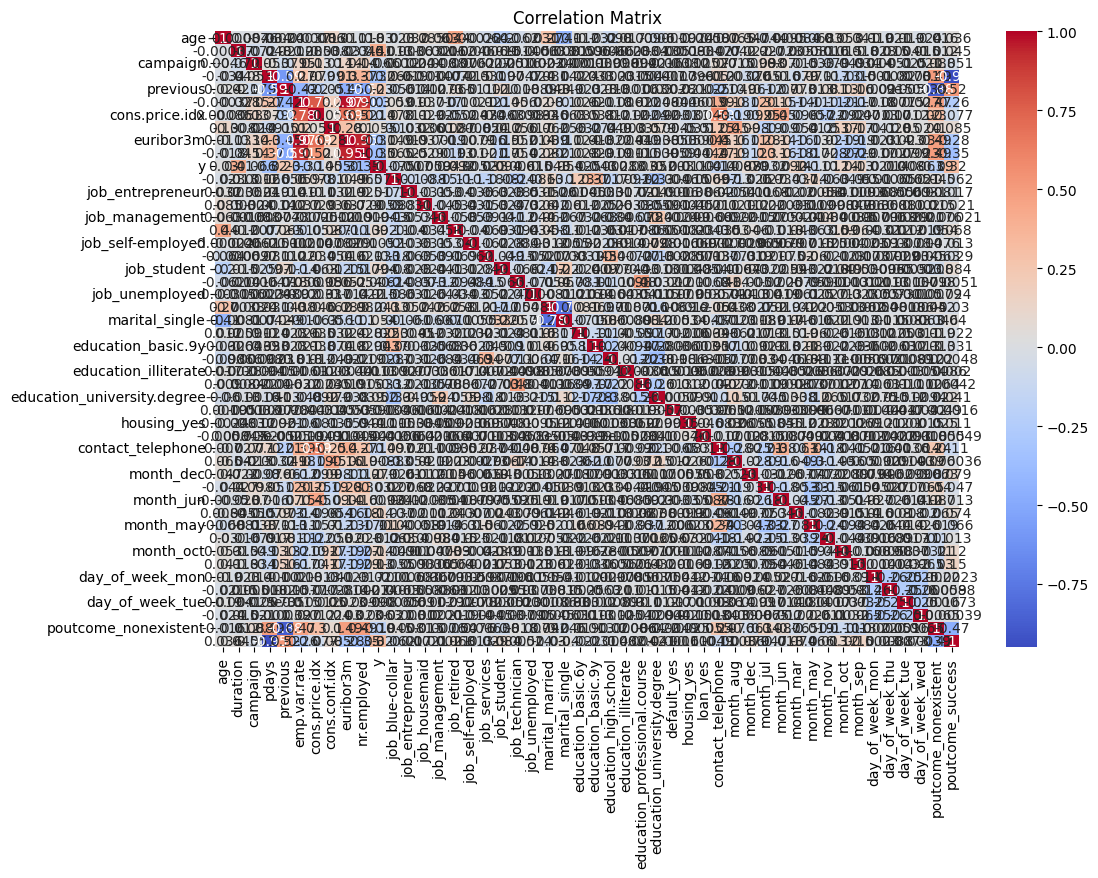

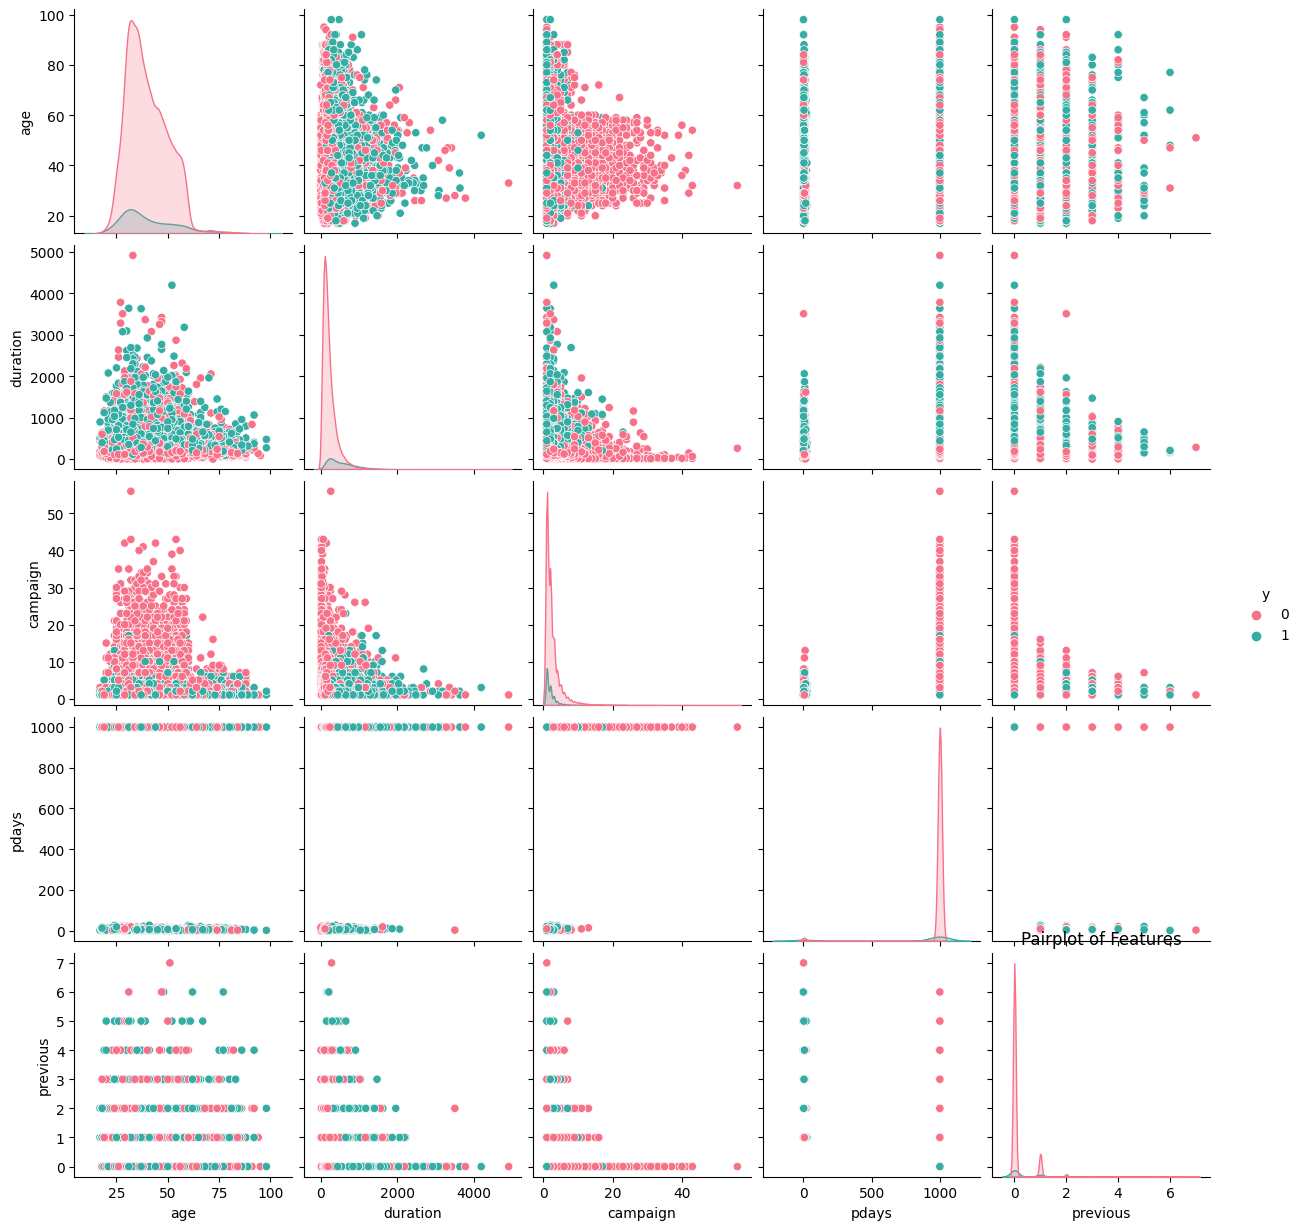

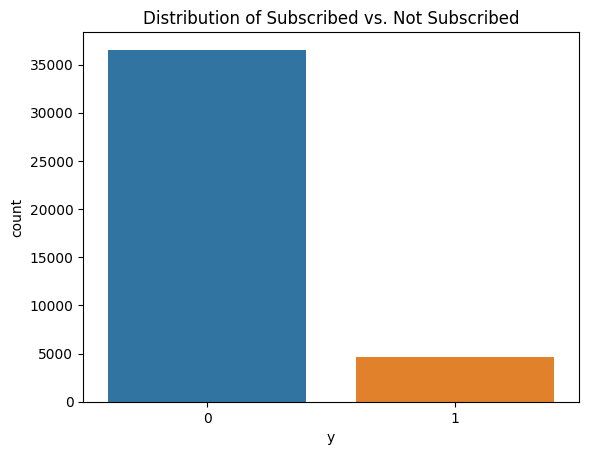

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset with the specified delimiter
data = pd.read_csv('/content/bank-additional-full.csv', sep=';')

# Display the first few rows of the dataset to get an overview
print(data.head())

# Get basic statistics of numeric columns
print(data.describe())

# Check for missing values
print(data.isnull().sum())

# Replace 'unknown' values with NaN in categorical columns
categorical_columns = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "day_of_week", "poutcome"]
data[categorical_columns] = data[categorical_columns].replace('unknown', np.nan)

# Handle missing values (you can choose different strategies for imputation)
data.fillna(method='ffill', inplace=True)  # Forward fill missing values

# Encode categorical variables using one-hot encoding
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Map the target variable to binary values
data['y'] = data['y'].map({'yes': 1, 'no': 0})

# Correlation matrix
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Pairplot for some important features
sns.pairplot(data[['age', 'duration', 'campaign', 'pdays', 'previous', 'y']], hue='y', palette='husl')
plt.title('Pairplot of Features')
plt.show()

# Analysis of the target variable
sns.countplot(x='y', data=data)
plt.title('Distribution of Subscribed vs. Not Subscribed')
plt.show()


# Model evaluation and metrics

# 1. Mean Squared Error (MSE):


In [ ]:
# 1. Mean Squared Error (MSE):

# MSE measures the average of the squared differences between actual and predicted values.
# Lower MSE indicates a better fit.
# python
# Copy code
# MSE = 1/n * Σ(y_i - y_hat_i)^2
from sklearn.metrics import mean_squared_error

y_true = [3, 4, 2, 8, 9]  # Actual values
y_pred = [2.8, 4.2, 2.3, 7.9, 8.7]  # Predicted values

mse = mean_squared_error(y_true, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 0.05400000000000008


# 2. R-squared (R2):


In [ ]:
# 2. R-squared (R2):

# R2 measures the proportion of the variance in the dependent variable explained by the independent variables.
# A higher R2 value indicates a better fit.
# python
# Copy code
from sklearn.metrics import r2_score

r2 = r2_score(y_true, y_pred)
print(f"R-squared (R2): {r2}")

R-squared (R2): 0.9930412371134021


# 3. Mean Absolute Error (MAE):


In [ ]:
# 3. Mean Absolute Error (MAE):

# MAE measures the average of the absolute differences between actual and predicted values.
# MAE is less sensitive to outliers compared to MSE.
# python
# Copy code
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_true, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

Mean Absolute Error (MAE): 0.2200000000000001


# 4. Root Mean Squared Error (RMSE):


In [ ]:
# 4. Root Mean Squared Error (RMSE):

# RMSE is the square root of the MSE.
# It provides a measure of the spread of errors in the predicted values.
# python
# Copy code

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 0.2323790007724452


#  classification metrics

# 1. Accuracy:


In [ ]:
# 1. Accuracy:
# Definition: Accuracy measures the proportion of correctly classified instances out of the total instances.

# Python Code:

# python
# Copy code
from sklearn.metrics import accuracy_score

y_true = [1, 0, 1, 1, 0, 1, 0]
y_pred = [1, 1, 1, 0, 1, 1, 0]

accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.5714285714285714


# 2. Precision:


In [ ]:
# 2. Precision:
# Definition: Precision measures the ability of the classifier to correctly classify positive instances.

# Python Code:

# python
# Copy code
from sklearn.metrics import precision_score

precision = precision_score(y_true, y_pred)
print(f"Precision: {precision}")

Precision: 0.6


# 3. Recall (Sensitivity):


In [ ]:
# . Recall (Sensitivity):
# Definition: Recall, also known as Sensitivity or True Positive Rate, measures the ability of the classifier to identify all positive instances.

# Python Code:

# python
# Copy code
from sklearn.metrics import recall_score

recall = recall_score(y_true, y_pred)
print(f"Recall (Sensitivity): {recall}")

Recall (Sensitivity): 0.75


# 4. F1 Score:


In [ ]:
# 4. F1 Score:
# Definition: F1 Score is the harmonic mean of precision and recall. It balances both metrics and is useful when there is an imbalance between the classes.

# Python Code:

# python
# Copy code
from sklearn.metrics import f1_score

f1 = f1_score(y_true, y_pred)
print(f"F1 Score: {f1}")

F1 Score: 0.6666666666666665


# 5. Area Under the Receiver Operating Characteristic Curve (AUC-ROC):


In [ ]:
# 5. Area Under the Receiver Operating Characteristic Curve (AUC-ROC):
# Definition: AUC-ROC measures the area under the Receiver Operating Characteristic (ROC) curve. It quantifies the ability of the classifier to distinguish between classes.

# Python Code:

# python
# Copy code
from sklearn.metrics import roc_auc_score

y_prob = [0.8, 0.6, 0.7, 0.4, 0.9, 0.7, 0.3]  # Probability scores for the positive class

roc_auc = roc_auc_score(y_true, y_prob)
print(f"AUC-ROC: {roc_auc}")

AUC-ROC: 0.5833333333333334


# 6. Area Under the Precision-Recall Curve (AUC-PRC):


In [ ]:
# 6. Area Under the Precision-Recall Curve (AUC-PRC):
# Definition: AUC-PRC measures the area under the Precision-Recall Curve. It is useful when dealing with imbalanced datasets.

# Python Code:

# python
# Copy code
from sklearn.metrics import average_precision_score

y_prob = [0.8, 0.6, 0.7, 0.4, 0.9, 0.7, 0.3]  # Probability scores for the positive class

prc_auc = average_precision_score(y_true, y_prob)
print(f"AUC-PRC: {prc_auc}")

AUC-PRC: 0.6666666666666666


# 7. Specificity:


In [ ]:
# 7. Specificity:
# Definition: Specificity measures the ability of the classifier to correctly identify negative instances.

# Python Code:

# python
# Copy code
from sklearn.metrics import confusion_matrix

y_true = [1, 0, 1, 1, 0, 1, 0]
y_pred = [1, 1, 1, 0, 1, 1, 0]

tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
specificity = tn / (tn + fp)
print(f"Specificity: {specificity}")

Specificity: 0.3333333333333333


# 8. F2 Score:


In [ ]:
# 8. F2 Score:
# Definition: The F2 Score is an extension of the F1 Score, giving more weight to recall. It is useful when recall is more important than precision.

# Python Code:

# python
# Copy code
from sklearn.metrics import fbeta_score

f2 = fbeta_score(y_true, y_pred, beta=2)
print(f"F2 Score: {f2}")

F2 Score: 0.7142857142857143


# Polynomial regression model


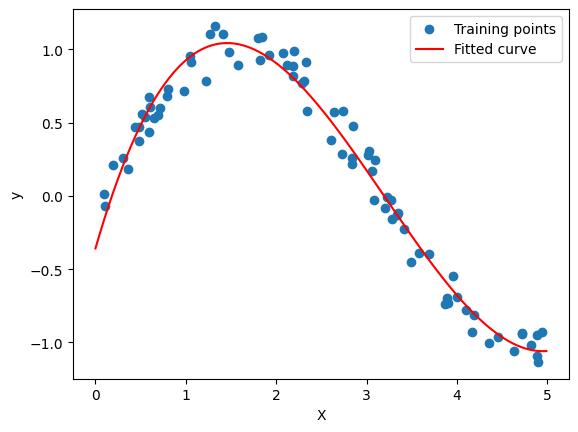

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# Generate synthetic data
np.random.seed(0)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0])

# Polynomial regression model
degree = 3  # Degree of the polynomial
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Fit the model to the data
model.fit(X, y)

# Predict on the entire range of X for visualization
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_pred = model.predict(X_test)

# Plot the data and the fitted curve
plt.scatter(X, y, label="Training points")
plt.plot(X_test, y_pred, color='r', label="Fitted curve")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()


# Ridge Regression model


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Generate synthetic data
X, y = make_regression(n_samples=10000, n_features=1, noise=5, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ridge Regression model
alpha = 1.0  # Regularization strength (higher values mean stronger regularization)
ridge_model = Ridge(alpha=alpha)

# Fit the model to the training data
ridge_model.fit(X_train, y_train)

# Predict on the test data
y_pred = ridge_model.predict(X_test)

# Calculate and print the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Ridge Regression MSE: {mse}")


Ridge Regression MSE: 24.781786871779328


# Lasso Regression model


In [ ]:
from sklearn.linear_model import Lasso

# Lasso Regression model
alpha = 1.0  # Regularization strength (higher values mean stronger regularization)
lasso_model = Lasso(alpha=alpha)

# Fit the model to the training data
lasso_model.fit(X_train, y_train)

# Predict on the test data
y_pred = lasso_model.predict(X_test)

# Calculate and print the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Lasso Regression MSE: {mse}")


Lasso Regression MSE: 25.98456685169437


# generator function

In [ ]:
import pandas as pd

# Sample DataFrame
data = {
    'Column1': ['A', 'B', 'A', 'A', 'C'],
    'Column2': ['X', 'Y', 'Y', 'X', 'Z'],
    'Numeric': [10, 20, 30, 40, 50]
}

df = pd.DataFrame(data)

def column_value_counts_generator(dataframe):
    for column in dataframe.columns:
        yield column, dataframe[column].value_counts()

# Iterate through the generator function to get value counts for each column
for column_name, value_counts in column_value_counts_generator(df):
    print(f"Value counts for {column_name}:\n{value_counts}\n")


Value counts for Column1:
A    3
B    1
C    1
Name: Column1, dtype: int64

Value counts for Column2:
X    2
Y    2
Z    1
Name: Column2, dtype: int64

Value counts for Numeric:
10    1
20    1
30    1
40    1
50    1
Name: Numeric, dtype: int64

